In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [ ]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

# 인코딩

In [ ]:
# 인코딩
encoder = Sequential(
    [
      Flatten(input_shape=(28,28)),
     Dense(128, activation="relu"),
     Dense(64, activation="relu")
    ]
)
encoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

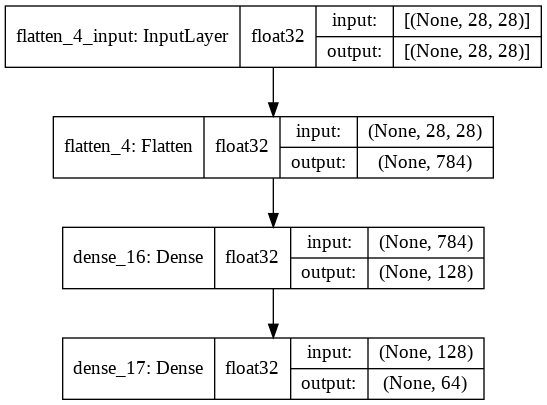

In [ ]:
# 인코더의 모양 조회
plot_model(encoder, show_dtype= True, show_shapes=True)

# 디코딩

In [ ]:
from tensorflow.keras.layers import Reshape

In [ ]:
decoder = Sequential ([
                       Dense(128, input_shape=(64,), activation="relu"),
                       Dense(784, activation="sigmoid"), # 위에서 타입변경해서
                       Reshape((28,28)) 
])

decoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_19 (Dense)             (None, 784)               101136    
_________________________________________________________________
reshape_4 (Reshape)          (None, 28, 28)            0         
Total params: 109,456
Trainable params: 109,456
Non-trainable params: 0
_________________________________________________________________


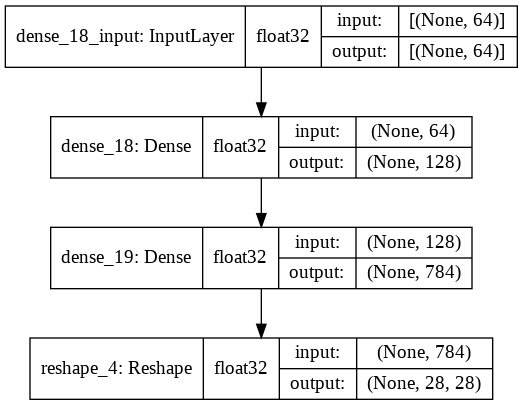

In [ ]:
plot_model(decoder, show_dtype=True, show_shapes=True)

In [ ]:
from tensorflow.keras import Model

In [ ]:
class Autoencoder(Model):
# 객체 생성시 실행되는 함수
# 인코더와 디코더를 입력받아서 속성에 저장
  def __init__(self, encoder, decoder):
    super(Autoencoder, self).__init__()
    self.encoder = encoder
    self.decoder = decoder

# 학습할 때 실행 되는 함수
# 매개변수 x : 학습, 테스트 데이터
  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    # 복원 이미지 평균
    return decoded 

In [ ]:
# 오토인코더 객체 생성
auto_encoder = Autoencoder(encoder, decoder)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [ ]:
# 오토인코더 옵티마이저 loss 함수 설정
auto_encoder.compile(optimizer=Adam(learning_rate=0.001), loss = MeanSquaredError())

In [ ]:

auto_encoder.fit(
    x=X_train,
    y=X_train,
    epochs=30,
    validation_data=(X_test, X_test)
)

Epoch 1/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0228 - val_loss: 0.0151
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0136 - val_loss: 0.0125
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0108 - val_loss: 0.0106
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 8/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 9/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 10/30
1875/1875 [==============================] - 12s 7ms/step - l

# 강사님꺼

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


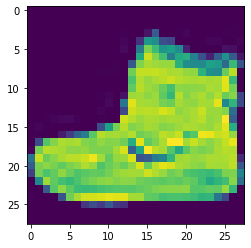

In [ ]:
plt.imshow(X_train[0])

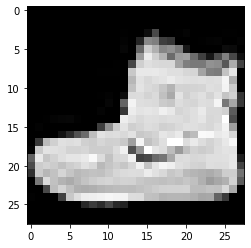

In [ ]:
plt.imshow(X_train[0])
plt.gray()

In [ ]:
y_train[0]

9

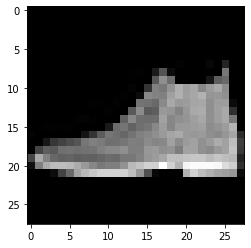

In [ ]:
plt.imshow(X_test[0])
plt.gray()

In [ ]:
y_test[0]

9

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
X_train[0].astype("float32")

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,  13.,  73.,   0.,   0.,   1.,   4.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   0.,  36., 136., 127.,  62.,  54.,   0.,   0.,   0.,
          1.,   3.,   4.,   0.,   0.,   3.],
       [  0.,   0.,   0.,   0.,   0

In [ ]:
X_train[0].astype("float32")/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train = X_train.astype("float32")/ 255

In [ ]:
X_test = X_test.astype("float32") /255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
encoder = Sequential(
            [
              Conv2D(
                  16, kernel_size= (3,3), strides=2 , padding="SAME", activation="relu",
                  input_shape=(28,28,1)
                   ),
              Conv2D(8, kernel_size=(3,3), strides=2, padding="SAME",activation="relu" )
            ])

In [ ]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

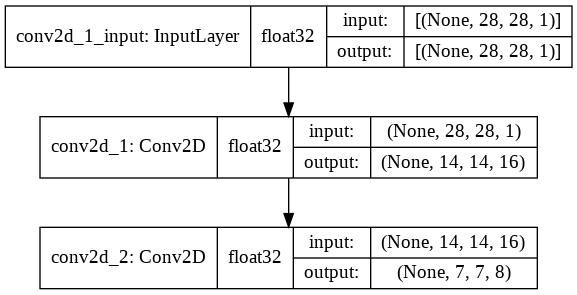

In [ ]:
plot_model(encoder, show_shapes=True, show_dtype=True)

In [ ]:
from tensorflow.keras.layers import Conv2DTranspose

In [ ]:

decoder = Sequential([
                      Conv2DTranspose(
                          8, kernel_size=3, padding="SAME", activation="relu"
                          ,input_shape=(7,7,8), strides=2
                        ),
                      Conv2DTranspose(
                          16, kernel_size=3, padding="SAME", activation="relu"
                          ,strides=2
                        ),
                      Conv2D(1, kernel_size=3, padding="SAME", activation="relu")

])

In [ ]:
decoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 16)        1168      
Total params: 1,752
Trainable params: 1,752
Non-trainable params: 0
_________________________________________________________________


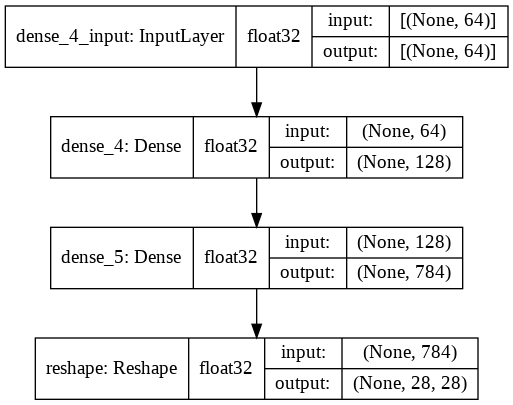

In [ ]:
plot_model(decoder, show_dtype=True, show_shapes=True)

In [ ]:
from tensorflow.keras import Model

class AutoEncoder(Model):
    def __init__(self, encoder, decoder):
        super(AutoEncoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
auto_encoder = AutoEncoder(encoder, decoder)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.losses import MeanSquaredError

In [ ]:
auto_encoder.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

In [ ]:
auto_encoder.fit(
    x=X_train,
    y=X_train,
    epochs=30,
    validation_data=(X_test, X_test)
)

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0223 - val_loss: 0.0147
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0131 - val_loss: 0.0121
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0098 - val_loss: 0.0096
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0090 - val_loss: 0.0093
Epoch 8/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0086 - val_loss: 0.0086
Epoch 10/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0